In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv('wine-clustering.csv')

In [3]:
# Assuming the target variable is the last column and it's categorical
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [4]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)


In [7]:
# Train the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classifi

In [13]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.0278
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Classification Report:
              precision    recall  f1-score   support

         290       0.00      0.00      0.00         0
         325       0.00      0.00      0.00         1
         342       0.00      0.00      0.00         1
         345       0.00      0.00      0.00         1
         365       0.00      0.00      0.00         0
         372       0.00      0.00      0.00         1
         378       0.00      0.00      0.00         0
         385       0.00      0.00      0.00         1
         392       0.00      0.00      0.00         0
         425       0.00      0.00      0.00         0
         428       0.00      0.00      0.00         0
         434       0.00      0.00      0.00         1
         450       0.00      0.00      0.00         0
         470       0.00      0.00      0.00         1
         48

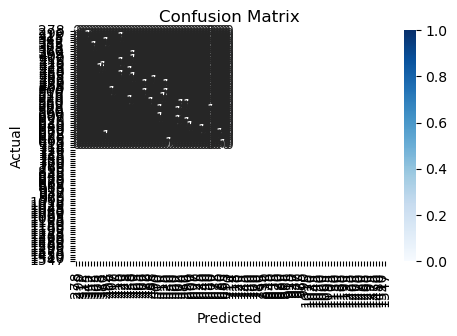

In [28]:
# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score


In [62]:
# Load dataset
df = pd.read_csv('wine-clustering.csv')


In [63]:
# Assuming the target variable is the last column
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [64]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)


In [67]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [68]:
# Define the scoring metric
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}

In [69]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [70]:
# Get the best model
best_rf = grid_search.best_estimator_

In [71]:
# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [72]:
print(f"Best Hyperparameters: {grid_search.best_params_}")
print("Evaluation Metrics for Best Model:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R-squared (R²): {r2:.4f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Evaluation Metrics for Best Model:
  Mean Absolute Error (MAE): 135.1568
  Mean Squared Error (MSE): 29384.3147
  Root Mean Squared Error (RMSE): 171.4185
  R-squared (R²): 0.7682


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, precision_score

In [74]:
# Load dataset
df = pd.read_csv('wine-clustering.csv')

In [75]:
# Assuming the target variable is the last column and it's categorical
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [76]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)


In [79]:
# Train the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)


In [81]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.0278
Precision: 0.0139
Recall: 0.0278
F1-score: 0.0185


In [83]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

         290       0.00      0.00      0.00         0
         325       0.00      0.00      0.00         1
         342       0.00      0.00      0.00         1
         345       0.00      0.00      0.00         1
         365       0.00      0.00      0.00         0
         372       0.00      0.00      0.00         1
         378       0.00      0.00      0.00         0
         385       0.00      0.00      0.00         1
         392       0.00      0.00      0.00         0
         425       0.00      0.00      0.00         0
         428       0.00      0.00      0.00         0
         434       0.00      0.00      0.00         1
         450       0.00      0.00      0.00         0
         470       0.00      0.00      0.00         1
         480       0.00      0.00      0.00         1
         495       0.00      0.00      0.00         0
         500       0.00      0.00      0.00         1
   

C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classifi

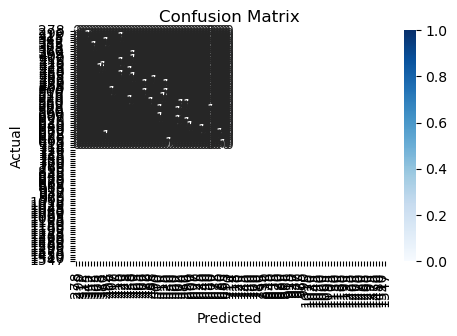

In [85]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [1]:
#c ko yei garan parene xa 

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer


In [104]:
# Load dataset
df = pd.read_csv('wine-clustering.csv')

In [105]:
# Assuming the target variable is the last column and it's categorical
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [106]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [107]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [108]:
# Define k-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

In [109]:
# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

In [110]:
# Check the unique labels
unique_labels = y.unique()
print("Unique labels:", unique_labels)

Unique labels: [1065 1050 1185 1480  735 1450 1290 1295 1045 1510 1280 1320 1150 1547
 1310 1130 1680  845  780  770 1035 1015  830 1195 1285  915 1515  990
 1235 1095  920  880 1105 1020  760  795  680  885 1080  985 1060 1260
 1265 1190 1375 1120  970 1270  520  450  630  420  355  678  502  510
  750  718  870  410  472  886  428  392  500  463  278  714  515  495
  562  625  480  290  345  937  660  406  710  438  415  672  315  488
  312  325  607  434  385  407  372  564  465  365  380  378  352  466
  342  580  530  560  600  650  695  720  590  550  855  425  675  640
  725  620  570  615  685  470  740  835  840]


In [112]:
# Create a custom scorer for precision, specifying an appropriate pos_label
custom_scorer = make_scorer(precision_score, pos_label=unique_labels[0], average='macro')


In [113]:
# Perform k-Fold Cross-Validation and evaluate metrics
results = {}
for metric in scoring:
    cv_results = cross_val_score(rf_classifier, X_scaled, y, cv=kf, scoring=scoring[metric])
    results[metric] = cv_results
    print(f"{metric.capitalize()} scores: {cv_results}")
    print(f"Average {metric}: {cv_results.mean():.4f}")
    print(f"Standard Deviation of {metric}: {cv_results.std():.4f}\n")

Accuracy scores: [0.         0.         0.02777778 0.         0.02857143]
Average accuracy: 0.0113
Standard Deviation of accuracy: 0.0138



C:\Windows\anoconda\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\utils\_response.py", line 203, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [ 278  290  312  315  345  352  355  365  378  380  392  406  407  410
  415  420  425  

Precision scores: [nan nan nan nan nan]
Average precision: nan
Standard Deviation of precision: nan



C:\Windows\anoconda\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\utils\_response.py", line 203, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [ 278  290  312  315  345  352  355  365  378  380  392  406  407  410
  415  420  425  

Recall scores: [nan nan nan nan nan]
Average recall: nan
Standard Deviation of recall: nan



C:\Windows\anoconda\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\utils\_response.py", line 203, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [ 278  290  312  315  345  352  355  365  378  380  392  406  407  410
  415  420  425  

F1_score scores: [nan nan nan nan nan]
Average f1_score: nan
Standard Deviation of f1_score: nan



C:\Windows\anoconda\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\utils\_response.py", line 203, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of [ 278  290  312  315  325  342  345  352  355  365  372  378  380  385
  392  407  415  

In [114]:
# c number ko answer ko code

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [116]:
# Define the parameter grid for Random Search
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [117]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)


In [123]:
# Perform Random Search with 5-fold cross-validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, random_state=42, n_jobs=-1)


In [124]:
# Fit the Random Search model
rf_random.fit(X_train, y_train)


C:\Windows\anoconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Windows\anoconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Windows\anoconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42)

In [120]:
# Evaluate the best model
best_rf = rf_random.best_estimator_


In [121]:
# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf, X, y, cv=kf, scoring='accuracy')

In [122]:
# Print the results
print("Best parameters found: ", rf_random.best_params_)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))
print("Standard deviation of cross-validation score: ", np.std(cv_scores))

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Cross-validation scores:  [0.02777778 0.         0.         0.         0.02857143]
Mean cross-validation score:  0.011269841269841268
Standard deviation of cross-validation score:  0.01380496184454533


In [125]:
# Final chosen model
final_model = best_rf

In [126]:
# Train the final model on the entire training set
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', random_state=42)

In [127]:
# Predict on the test set
y_pred = final_model.predict(X_test)

In [128]:
# Evaluate the final model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [129]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)


C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [130]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Confusion Matrix:\n", cm)

Accuracy:  0.0
Precision:  0.0
Recall:  0.0
F1-score:  0.0
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [152]:
#d no 

In [191]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
import numpy as np


In [192]:
# Load the dataset
df = pd.read_csv('wine-clustering.csv')

In [193]:
# Define the target variable
df['target'] = pd.qcut(df['Alcohol'], q=3, labels=['Low', 'Medium', 'High'])

In [194]:
# Define features and target
X = df.drop(columns=['Alcohol', 'target'])  # Dropping the target and Alcohol column if it's part of the features
y = df['target']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [197]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)


In [198]:
# Perform Random Search with 5-fold cross-validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)


In [199]:
# Fit the Random Search model
rf_random.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42)

In [200]:
# Evaluate the best model
best_rf = rf_random.best_estimator_

In [201]:
# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf, X, y, cv=kf, scoring='accuracy')

In [209]:
# Print the results
print("Best parameters found: ", rf_random.best_params_)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))
print("Standard deviation of cross-validation score: ", np.std(cv_scores))

Best parameters found:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Cross-validation scores:  [0.66666667 0.61111111 0.69444444 0.68571429 0.65714286]
Mean cross-validation score:  0.663015873015873
Standard deviation of cross-validation score:  0.029137254363387315


In [210]:
# Final chosen model
final_model = best_rf


In [211]:
# Train the final model on the entire training set
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [212]:
# Predict on the test set
y_pred = final_model.predict(X_test)

In [206]:
# Evaluate the final model

In [213]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

In [214]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Confusion Matrix:\n", cm)

Accuracy:  0.6944444444444444
Precision:  0.7085858585858585
Recall:  0.6944444444444444
F1-score:  0.7006737859140606
Confusion Matrix:
 [[11  0  4]
 [ 0 10  2]
 [ 4  1  4]]
